BiDirection Encoder Representations from Transformers (BERT)

- Path way to LLM models , way to GenAI models

- Package: Transformers

- Develop by Hugging Face

In [ ]:
! pip install transformers
! pip install timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 15.0 MB/s eta 0:00:00


he bit by python

he is learning python programming language

## Tasks cover using Transformers

The easiest way to use a pretrained model on a given task is to use `pipeline`. 🤗 Transformers
provides the following tasks out of the box:

- Sentiment analysis: is a text positive or negative?
- Text generation (in English): provide a prompt and the model will generate what follows.
- Name entity recognition (NER): in an input sentence, label each word with the entity it represents (person, place,
  etc.)
- Question answering: provide the model with some context and a question, extract the answer from the context.
- Filling masked text: given a text with masked words (e.g., replaced by `[MASK]`), fill the blanks.
- Summarization: generate a summary of a long text.
- Translation: translate a text in another language.
- Feature extraction: return a tensor representation of the text.

Let's see how this work for sentiment analysis (the other tasks are all covered in the [task summary](https://huggingface.co/transformers/task_summary.html)):

In [ ]:
from transformers import pipeline
classifier = pipeline('sentiment-analysis')

# In side pipeline you need to provide two thing
# task name='sentiment analysis'
# model name:
# if you did not provide the model name :  Distilbert model

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [ ]:
dir(classifier)

['__abstractmethods__',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_batch_size',
 '_ensure_tensor_on_device',
 '_forward',
 '_forward_params',
 '_num_workers',
 '_postprocess_params',
 '_preprocess_params',
 '_sanitize_parameters',
 'binary_output',
 'call_count',
 'check_model_type',
 'default_input_names',
 'device',
 'device_placement',
 'ensure_tensor_on_device',
 'feature_extractor',
 'forward',
 'framework',
 'function_to_apply',
 'get_inference_context',
 'get_iterator',
 'image_processor',
 'iterate',
 'model',
 'modelcard',
 'postprocess',
 'predict',
 'preprocess',
 'return_all_scores',
 'run_multi',
 'run_single

In [ ]:
classifier.model

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
 

In [ ]:
classifier.tokenizer

DistilBertTokenizerFast(name_or_path='distilbert/distilbert-base-uncased-finetuned-sst-2-english', vocab_size=30522, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}

In [ ]:
classifier('We are very happy to show you the 🤗 Transformers library.')

[{'label': 'POSITIVE', 'score': 0.9997795224189758}]

In [ ]:
classifier('The movie is not that great but the direction is awesome.')

[{'label': 'POSITIVE', 'score': 0.9998683929443359}]

In [ ]:
results = classifier(["We are very happy to show you the 🤗 Transformers library.",
           "We hope you don't hate it."])
for result in results:
    print(f"label: {result['label']}, with score: {round(result['score'], 4)}")

label: POSITIVE, with score: 0.9998
label: NEGATIVE, with score: 0.5309


You can see the second sentence has been classified as negative (it needs to be positive or negative) but its score is
fairly neutral.

By default, the model downloaded for this pipeline is called "distilbert-base-uncased-finetuned-sst-2-english". We can
look at its [model page](https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english) to get more
information about it. It uses the [DistilBERT architecture](https://huggingface.co/transformers/model_doc/distilbert.html) and has been fine-tuned on a
dataset called SST-2 for the sentiment analysis task.

Let's say we want to use another model; for instance, one that has been trained on French data. We can search through
the [model hub](https://huggingface.co/models) that gathers models pretrained on a lot of data by research labs, but
also community models (usually fine-tuned versions of those big models on a specific dataset). Applying the tags
"French" and "text-classification" gives back a suggestion "nlptown/bert-base-multilingual-uncased-sentiment". Let's
see how we can use it.

You can directly pass the name of the model to use to `pipeline`:

In [ ]:
classifier = pipeline('sentiment-analysis', model="nlptown/bert-base-multilingual-uncased-sentiment")

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [ ]:
classifier("bonjour, la nourriture est bonne.")

[{'label': '4 stars', 'score': 0.45549502968788147}]

In [ ]:
classifier("heureux d'enseigner les transformateurs")

[{'label': '5 stars', 'score': 0.5140328407287598}]

## image classification

In [ ]:
from transformers import pipeline

classifier = pipeline(task="image-classification")
preds = classifier(
    "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/pipeline-cat-chonk.jpeg"
)
preds = [{"score": round(pred["score"], 4), "label": pred["label"]} for pred in preds]
print(*preds, sep="\n")

No model was supplied, defaulted to google/vit-base-patch16-224 and revision 5dca96d (https://huggingface.co/google/vit-base-patch16-224).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

{'score': 0.4335, 'label': 'lynx, catamount'}
{'score': 0.0348, 'label': 'cougar, puma, catamount, mountain lion, painter, panther, Felis concolor'}
{'score': 0.0324, 'label': 'snow leopard, ounce, Panthera uncia'}
{'score': 0.0239, 'label': 'Egyptian cat'}
{'score': 0.0229, 'label': 'tiger cat'}


In [ ]:
from transformers import pipeline

classifier = pipeline(task="image-classification")
preds = classifier("/content/person.jpg")
preds = [{"score": round(pred["score"], 4), "label": pred["label"]} for pred in preds]
print(*preds, sep="\n")

No model was supplied, defaulted to google/vit-base-patch16-224 and revision 5dca96d (https://huggingface.co/google/vit-base-patch16-224).
Using a pipeline without specifying a model name and revision in production is not recommended.


{'score': 0.0904, 'label': 'collie'}
{'score': 0.0876, 'label': 'Border collie'}
{'score': 0.0382, 'label': 'kelpie'}
{'score': 0.0372, 'label': 'Shetland sheepdog, Shetland sheep dog, Shetland'}
{'score': 0.032, 'label': 'kuvasz'}


## Object detection

In [ ]:
from transformers import pipeline

detector = pipeline(task="object-detection")
preds = detector(
    "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/pipeline-cat-chonk.jpeg"
)
preds = [{"score": round(pred["score"], 4), "label": pred["label"], "box": pred["box"]} for pred in preds]
preds

No model was supplied, defaulted to facebook/detr-resnet-50 and revision 2729413 (https://huggingface.co/facebook/detr-resnet-50).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/4.59k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/167M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


preprocessor_config.json:   0%|          | 0.00/274 [00:00<?, ?B/s]

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.


[{'score': 0.9864,
  'label': 'cat',
  'box': {'xmin': 178, 'ymin': 154, 'xmax': 882, 'ymax': 598}}]

In [ ]:
from transformers import pipeline
detector = pipeline(task="object-detection")

preds = detector("/content/person.jpg")
preds = [{"score": round(pred["score"], 4),
          "label": pred["label"],
          "box": pred["box"]} for pred in preds]
preds

No model was supplied, defaulted to facebook/detr-resnet-50 and revision 2729413 (https://huggingface.co/facebook/detr-resnet-50).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/4.59k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/167M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


preprocessor_config.json:   0%|          | 0.00/274 [00:00<?, ?B/s]

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.


[{'score': 0.999,
  'label': 'dog',
  'box': {'xmin': 64, 'ymin': 265, 'xmax': 200, 'ymax': 347}},
 {'score': 0.9993,
  'label': 'person',
  'box': {'xmin': 189, 'ymin': 98, 'xmax': 274, 'ymax': 375}},
 {'score': 0.9982,
  'label': 'horse',
  'box': {'xmin': 405, 'ymin': 138, 'xmax': 602, 'ymax': 345}}]

In [ ]:
l=[list(i['box'].values()) for i in preds]
l

[[64, 265, 200, 347], [189, 98, 274, 375], [405, 138, 602, 345]]

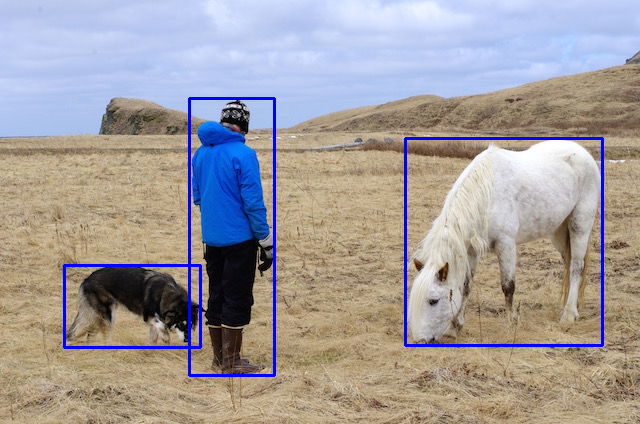

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
image = cv2.imread("/content/person.jpg")
color = (255, 0, 0)
for i in l:
    thickness = 2
    image = cv2.rectangle(image,(i[0],i[1]),(i[2],i[3]), color, thickness)

# Displaying the image
cv2_imshow(image)


In [ ]:
from transformers import pipeline

segmenter = pipeline(task="image-segmentation")
preds = segmenter(
    "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/pipeline-cat-chonk.jpeg"
)
preds = [{"score": round(pred["score"], 4), "label": pred["label"]} for pred in preds]
print(*preds, sep="\n")

No model was supplied, defaulted to facebook/detr-resnet-50-panoptic and revision fc15262 (https://huggingface.co/facebook/detr-resnet-50-panoptic).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/11.6k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/172M [00:00<?, ?B/s]

Some weights of the model checkpoint at facebook/detr-resnet-50-panoptic were not used when initializing DetrForSegmentation: ['detr.model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'detr.model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'detr.model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'detr.model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForSegmentation from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForSegmentation from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


preprocessor_config.json:   0%|          | 0.00/273 [00:00<?, ?B/s]

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.
`label_ids_to_fuse` unset. No instance will be fused.


{'score': 0.9879, 'label': 'LABEL_184'}
{'score': 0.9973, 'label': 'snow'}
{'score': 0.9972, 'label': 'cat'}


In [ ]:
from transformers import pipeline

depth_estimator = pipeline(task="depth-estimation")
preds = depth_estimator(
    "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/pipeline-cat-chonk.jpeg"
)

## Text translaion

In [ ]:
from transformers import pipeline

text = "translate English to Spanish: Hugging Face is a community-based open-source platform for machine learning."
translator = pipeline(task="translation", model="google-t5/t5-small")
translator(text)

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/__init__.py:1086: UserWarning: "translation" task was used, instead of "translation_XX_to_YY", defaulting to "translation_en_to_de"
  warnings.warn(


[{'translation_text': 'Hugging Face ist eine Community-basierte Open-Source-Plattform für das maschinelle Lernen.'}]